In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/procns/Desktop/인공지능/Homework/HW_3/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

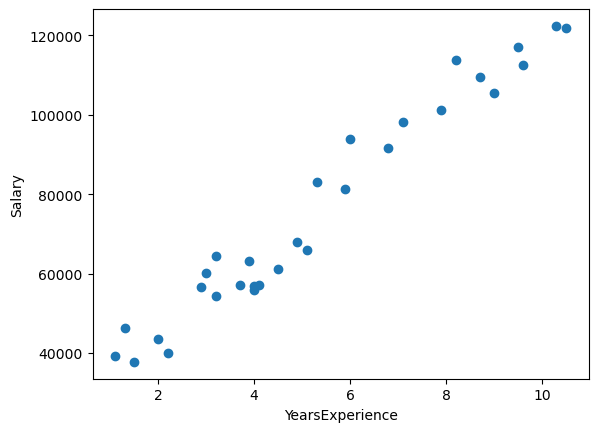

In [7]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

plt.show()


In [8]:
y_data = data['YearsExperience']
X_data = data['Salary']

In [9]:
train_input, test_input, train_target, test_target = train_test_split(
    X_data, y_data, random_state = 0)

In [10]:
train_input = train_input.values.reshape(-1,1)
test_input = test_input.values.reshape(-1,1)
train_input.shape

(22, 1)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.coef_ ,lr.intercept_ ) # 기울기, y절편

[0.00010017] -2.4069397347271453


In [12]:
y_pred = lr.predict(test_input) 
y_pred

array([1.372477  , 9.85265035, 3.31071648, 3.9254439 , 9.30954262,
       8.55448065, 8.87541705, 3.18180101])

In [13]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9395413526983523
0.974376290571024


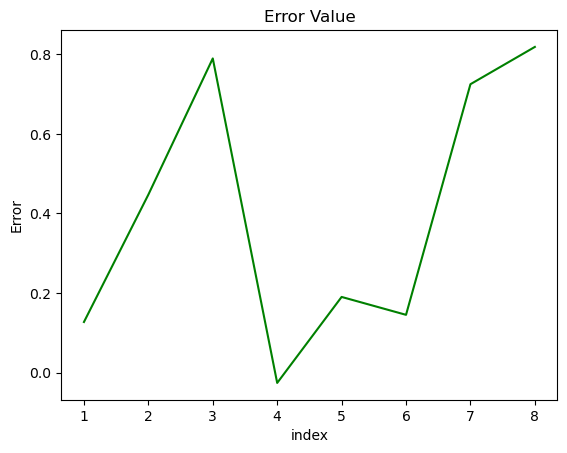

In [14]:
c = [i for i in range(1,len(test_target)+1,1)]
plt.plot(c,test_target - y_pred, color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

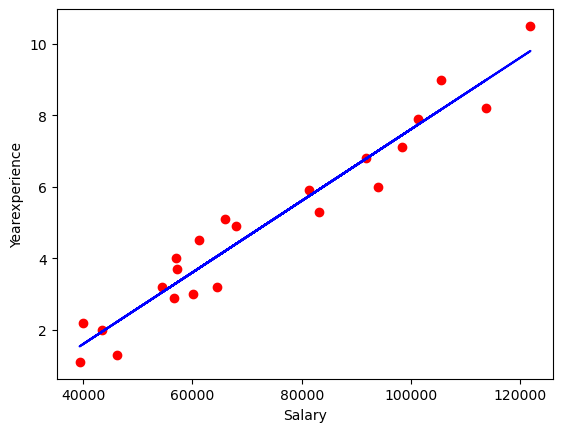

In [15]:
plt.scatter(train_input, train_target, color = 'red')
#훈련 데이터 선점도
plt.plot(train_input, lr.predict(train_input), color='blue')
plt.xlabel('Salary')
plt.ylabel('Yearexperience')
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error
# 테스트 세트에 대한 예측을 만듭니다
y_pred = lr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, y_pred)
print(mae)

0.40854484439547784


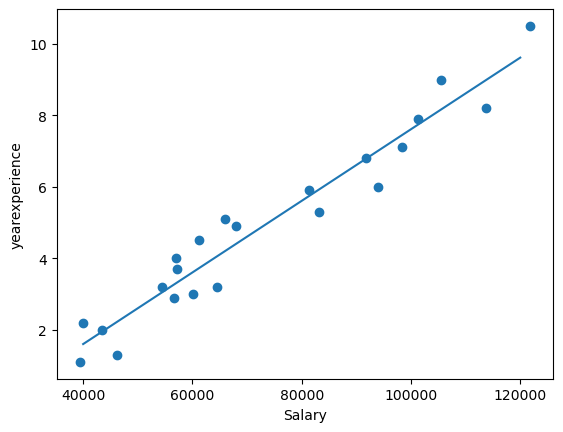

In [20]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([40000, 120000], [40000 * lr.coef_+lr.intercept_, 120000*lr.coef_+lr.intercept_])
plt.xlabel('Salary')
plt.ylabel('yearexperience')
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(22, 2)


In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.coef_ ,lr.intercept_ ) # 기울기, y절편

[8.87738670e-05 7.28872825e-11] -2.006423627577634


In [24]:
y_pred = lr.predict(test_poly) 
y_pred

array([1.44686755, 9.95051792, 3.29836177, 3.89697785, 9.37459217,
       8.5810251 , 8.91731583, 3.17352146])

In [25]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9397792523693133
0.9761562914369224


In [26]:
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, y_pred)
print(mae)

0.3701025437263236
